In [461]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [462]:
"""
__File name__:          IGTLab_RetoFurrer_2019.py
__Author__:             Reto Furrer
__Date created__:       02.09.2019
__Date last modified__: 06.09.2019
__Python Version__:     3.6
__Project__:            IGT-Lab 2019 (02.09.2019-13.09.2019)
__Description__:        This file contains the methods to measure the wall thickness of 
                        polymer tubes in microCT images. 
"""

'\n__File name__:          IGTLab_RetoFurrer_2019.py\n__Author__:             Reto Furrer\n__Date created__:       02.09.2019\n__Date last modified__: 06.09.2019\n__Python Version__:     3.6\n__Project__:            IGT-Lab 2019 (02.09.2019-13.09.2019)\n__Description__:        This file contains the methods to measure the wall thickness of \n                        polymer tubes in microCT images. \n'

In [463]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import glob

from matplotlib.patches import Arc
from skimage import data, feature, color
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage import util 

In [464]:
# Load image data set into list
#img = sorted(glob.glob('img/X/rec/*.png'))

# Read the original image
image = plt.imread('img/Y/rec/trial1_rec0315.png')
#plt.imshow(image)

462
466
[231.0, 233.0]


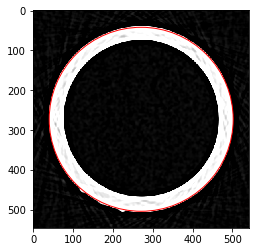

In [465]:
## Find outer diameter and reduce image to Region of interest with padding of 40px
# Convert image into array
image = np.asarray(image)

# Apply gaussian filter to the gray image to reduce salt&pepper noise
img_filtered = ndimage.gaussian_filter(image, sigma=5.5)
#img_filtered = ndimage.median_filter(img_filtered, 3)

# Convert image into gray to be sure it is gray 
img_gray = color.rgb2gray(img_filtered) 
plt.savefig('img_filtered_gray.pdf')

# Apply Canny edge detector
img_canny = feature.canny(img_gray, sigma=5.5)

# compute offsets of fullsize image to retina view 
edge_indices = np.where(img_canny)
y_min = min(edge_indices[0])
y_max = max(edge_indices[0])
x_min = min(edge_indices[1])
x_max = max(edge_indices[1])

#Calculating outer diameter
d_outer_x = x_max - x_min
d_outer_y = y_max - y_min
print(d_outer_x)
print(d_outer_y)

#Calculate center point
center = [(x_max - x_min)/2,(y_max - y_min)/2]
print(center)

# Define padding around the region of interest
padding = 40
# copy reduced image       
reduced_img = image[y_min-padding:y_max+padding, x_min-padding:x_max+padding]
#plt.imshow(reduced_img)

#circ = plt.Circle((20,20),3, color="red", fill=False)

f, ax = plt.subplots()
circle = plt.Circle((center[0]+padding,center[1]+padding), d_outer_x/2, color="red", fill=False)
ax.imshow(reduced_img, cmap='gray', interpolation='nearest')
ax.add_artist(circle)
plt.show()
    
plt.savefig('img_reduced.pdf')

462
466
123


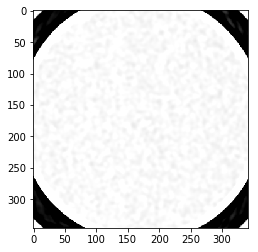

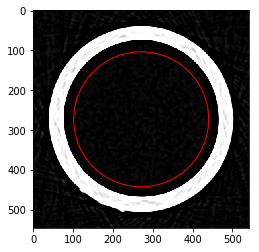

In [466]:
## Find inner diameter on the reduced image
innerpadding = 60
reduced_img_wo_padding = image[y_min+innerpadding:y_max-innerpadding, x_min+innerpadding:x_max-innerpadding]
reduced_img_wo_padding = util.invert(reduced_img_wo_padding)

# Convert image into array
reduced_img_wo_padding = np.asarray(reduced_img_wo_padding)


# Convert image into gray to be sure it is gray 
img_gray_wo_padding = color.rgb2gray(reduced_img_wo_padding) 
plt.imshow(reduced_img_wo_padding)

# Apply Canny edge detector
img_canny_wo_padding = feature.canny(img_gray_wo_padding, sigma=5.5)

# compute offsets of fullsize image to retina view 
edge_indices = np.where(img_canny_wo_padding)
y_min = min(edge_indices[0])
y_max = max(edge_indices[0])
x_min = min(edge_indices[1])
x_max = max(edge_indices[1])

#Calculating outer diameter
d_inner_x = x_max - x_min
d_inner_y = y_max - y_min
print(d_outer_x)
print(d_outer_y)

#Calculate center point
center_inner = [(x_max - x_min)/2,(y_max - y_min)/2]
print(d_outer_x-d_inner_x)

# Calculating wall thickness
wallthickness_x = (d_outer_x-d_inner_x)/2
wallthickness_y = (d_outer_y-d_inner_y)/2

wallthicknesses = [wallthickness_x, wallthickness_y]

offset_x = padding + wallthickness_x + center_inner[0]
offset_y = padding + wallthickness_y + center_inner[1]

f, ax = plt.subplots()
circle = plt.Circle((offset_x,offset_y), d_inner_x/2, color="red", fill=False)
ax.imshow(reduced_img, cmap='gray', interpolation='nearest')
ax.add_artist(circle)
plt.show()
    
plt.savefig('img_reduced2.pdf')

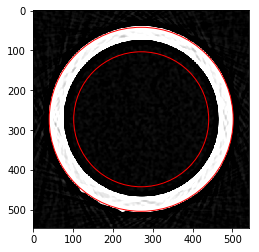

In [467]:
f, ax = plt.subplots()
circle_inner = plt.Circle((center[0]+padding,center[1]+padding), d_inner_x/2, color="red", fill=False)
circle_outer = plt.Circle((center[0]+padding,center[1]+padding), d_outer_x/2, color="red", fill=False)
ax.imshow(reduced_img, cmap='gray', interpolation='nearest')
ax.add_artist(circle_inner)
ax.add_artist(circle_outer)
plt.show()

In [468]:
# Print wall thicknesses in x and y direction
print(wallthicknesses)

[61.5, 61.5]
